Importation des bibliothèques nécessaires

Importation des bibliothèques nécessaires

In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd  # Librairie pour la manipulation des données
import numpy as np  # Librairie pour les calculs numériques
import matplotlib.pyplot as plt  # Librairie pour les visualisations
import seaborn as sns  # Librairie pour les visualisations statistiques
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensemble d'entraînement et de test
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.ensemble import RandomForestRegressor  # Modèle de régression par forêt aléatoire
from sklearn.neural_network import MLPRegressor  # Réseau de neurones pour la régression
from sklearn.metrics import mean_squared_error, r2_score  # Fonctions d'évaluation du modèle
from sklearn.impute import KNNImputer  # Pour l'imputation des valeurs manquantes


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\aurel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Étape 1 : Chargement des données

In [4]:
df = pd.read_csv("meteo.csv")

Aperçu des données

In [5]:
df.head()

index           Date_Heure  Pression au niveau mer  \
0    7539  2013-01-01 04:00:00                101480.0   
1    9744  2013-01-01 07:00:00                101420.0   
2    7551  2013-01-01 10:00:00                101520.0   
3  114124  2013-01-01 13:00:00                101520.0   
4    7566  2013-01-01 16:00:00                101520.0   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                             -230.0                            6.0   
1                              -60.0                            5.0   
2                              100.0                            3.0   
3                                0.0                            0.0   
4                                0.0                            5.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                           80.0                          4.6       282.55   
1                           10.0                          4.6       282.05   
2                          350.0                          4.6       282.25   
3                          350.0                          5.1       283.85   
4                           40.0                          1.5       283.65   

   Point de rosée  Humidité  ...  Temps présent  Pression station  \
0          280.85      89.0  ...            2.0          101380.0   
1          280.45      90.0  ...            2.0          101320.0   
2          280.35      88.0  ...            2.0          101420.0   
3          280.95      82.0  ...            2.0          101420.0   
4          281.45      86.0  ...            2.0          101420.0   

   Rafales sur une période  Periode de mesure de la rafale  \
0                      9.3                           -10.0   
1                      6.2                           -10.0   
2                      6.7                           -10.0   
3                      7.2                           -10.0   
4                      2.6                           -10.0   

   Précipitations dans la dernière heure  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Précipitations dans les 3 dernières heures  Température (°C)  consommation  \
0                                         0.0               9.4       27896.0   
1                                         0.0               8.9       24316.0   
2                                         0.0               9.1       24546.0   
3                                         0.0              10.7       27431.0   
4                                         0.0              10.5       26963.0   

   datehour  datemonth  
0         4          1  
1         7          1  
2        10          1  
3        13          1  
4        16          1  

[5 rows x 21 columns]

In [6]:
df.tail()

index           Date_Heure  Pression au niveau mer  \
25994  174014  2022-01-04 11:00:00                100450.0   
25995  166969  2022-01-04 14:00:00                100510.0   
25996  166976  2022-01-04 17:00:00                100480.0   
25997  171804  2022-01-04 20:00:00                100540.0   
25998  166994  2022-01-04 23:00:00                100610.0   

       Variation de pression en 3 heures  Type de tendance barométrique  \
25994                              250.0                            1.0   
25995                               60.0                            0.0   
25996                              -30.0                            8.0   
25997                               60.0                            1.0   
25998                               70.0                            1.0   

       Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  \
25994                          300.0                         10.4   
25995                          310.0                         14.4   
25996                          300.0                         13.4   
25997                          300.0                         12.1   
25998                          300.0                          9.3   

       Température  Point de rosée  Humidité  ...  Temps présent  \
25994       281.75          269.25      41.0  ...            0.0   
25995       283.05          267.45      33.0  ...            0.0   
25996       282.35          266.45      32.0  ...            0.0   
25997       279.75          270.55      52.0  ...            0.0   
25998       278.85          269.75      52.0  ...            0.0   

       Pression station  Rafales sur une période  \
25994          100350.0                     17.1   
25995          100410.0                     21.0   
25996          100380.0                     22.6   
25997          100440.0                     23.7   
25998          100510.0                     18.0   

       Periode de mesure de la rafale  Précipitations dans la dernière heure  \
25994                           -10.0                                    0.0   
25995                           -10.0                                    0.0   
25996                           -10.0                                    0.0   
25997                           -10.0                                    0.0   
25998                           -10.0                                    0.0   

       Précipitations dans les 3 dernières heures  Température (°C)  \
25994                                         0.0               8.6   
25995                                         0.0               9.9   
25996                                         0.0               9.2   
25997                                         0.0               6.6   
25998                                         0.0               5.7   

       consommation  datehour  datemonth  
25994       34510.0        11          1  
25995       32961.0        14          1  
25996       30815.0        17          1  
25997       33413.0        20          1  
25998       33090.0        23          1  

[5 rows x 21 columns]

Informations sur le DataFrame

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25999 entries, 0 to 25998
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       25999 non-null  int64  
 1   Date_Heure                                  25999 non-null  object 
 2   Pression au niveau mer                      25994 non-null  float64
 3   Variation de pression en 3 heures           25984 non-null  float64
 4   Type de tendance barométrique               25984 non-null  float64
 5   Direction du vent moyen 10 mn               25998 non-null  float64
 6   Vitesse du vent moyen 10 mn                 25998 non-null  float64
 7   Température                                 25995 non-null  float64
 8   Point de rosée                              25995 non-null  float64
 9   Humidité                                    25995 non-null  float64
 10  Visibilité

In [8]:
print("Valeurs manquantes par colonne:")
df.isnull().sum()


Valeurs manquantes par colonne:


index                                            0
Date_Heure                                       0
Pression au niveau mer                           5
Variation de pression en 3 heures               15
Type de tendance barométrique                   15
Direction du vent moyen 10 mn                    1
Vitesse du vent moyen 10 mn                      1
Température                                      4
Point de rosée                                   4
Humidité                                         4
Visibilité horizontale                          14
Temps présent                                 2285
Pression station                                 3
Rafales sur une période                       2237
Periode de mesure de la rafale                2231
Précipitations dans la dernière heure         1593
Précipitations dans les 3 dernières heures      61
Température (°C)                                 4
consommation                                     0
datehour                       

In [9]:
df.isnull().sum() / df.shape[0] * 100

index                                         0.000000
Date_Heure                                    0.000000
Pression au niveau mer                        0.019232
Variation de pression en 3 heures             0.057695
Type de tendance barométrique                 0.057695
Direction du vent moyen 10 mn                 0.003846
Vitesse du vent moyen 10 mn                   0.003846
Température                                   0.015385
Point de rosée                                0.015385
Humidité                                      0.015385
Visibilité horizontale                        0.053848
Temps présent                                 8.788800
Pression station                              0.011539
Rafales sur une période                       8.604177
Periode de mesure de la rafale                8.581099
Précipitations dans la dernière heure         6.127159
Précipitations dans les 3 dernières heures    0.234624
Température (°C)                              0.015385
consommati

In [10]:
df.duplicated().sum()

np.int64(0)

Comptage des valeurs uniques pour les colonnes de type "object"

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print("***" * 20)

Date_Heure
2022-01-04 23:00:00    1
2013-01-01 04:00:00    1
2013-01-01 07:00:00    1
2013-01-01 10:00:00    1
2013-01-01 13:00:00    1
                      ..
2013-01-03 13:00:00    1
2013-01-03 10:00:00    1
2013-01-03 07:00:00    1
2013-01-03 04:00:00    1
2013-01-03 01:00:00    1
Name: count, Length: 25999, dtype: int64
************************************************************


Statistiques descriptives

In [12]:
df.describe().T

count           mean  \
index                                       25999.0   78798.437517   
Pression au niveau mer                      25994.0  101685.139263   
Variation de pression en 3 heures           25984.0       0.089671   
Type de tendance barométrique               25984.0       4.338708   
Direction du vent moyen 10 mn               25998.0     192.903300   
Vitesse du vent moyen 10 mn                 25998.0       4.159693   
Température                                 25995.0     288.949131   
Point de rosée                              25995.0     281.953535   
Humidité                                    25995.0      66.330102   
Visibilité horizontale                      25985.0   36825.669810   
Temps présent                               23714.0       3.575862   
Pression station                            25996.0  101589.399138   
Rafales sur une période                     23762.0       7.024287   
Periode de mesure de la rafale              23768.0     -10.000000   
Précipitations dans la dernière heure       24406.0       0.058555   
Précipitations dans les 3 dernières heures  25938.0       0.199491   
Température (°C)                            25995.0      15.799131   
consommation                                25999.0   25617.072310   
datehour                                    25999.0      12.099119   
datemonth                                   25999.0       6.514212   

                                                     std       min        25%  \
index                                       45708.723419      9.00   39376.00   
Pression au niveau mer                        712.869122  98370.00  101310.00   
Variation de pression en 3 heures             109.381106   -840.00     -70.00   
Type de tendance barométrique                   2.724209      0.00       2.00   
Direction du vent moyen 10 mn                 119.915290      0.00      70.00   
Vitesse du vent moyen 10 mn                     2.596330      0.00       2.20   
Température                                     7.229185    267.35     283.55   
Point de rosée                                  6.645649    256.55     277.45   
Humidité                                       18.997159     11.00      52.00   
Visibilité horizontale                      19985.154141     60.00   18920.00   
Temps présent                                  12.356059      0.00       0.00   
Pression station                              711.770942  98280.00  101220.00   
Rafales sur une période                         4.012793      0.50       4.00   
Periode de mesure de la rafale                  0.000000    -10.00     -10.00   
Précipitations dans la dernière heure           0.809193     -0.10       0.00   
Précipitations dans les 3 dernières heures      2.194822     -0.10       0.00   
Température (°C)                                7.229185     -5.80      10.40   
consommation                                 6108.797484  12762.00   21332.50   
datehour                                        6.886917      1.00       7.00   
datemonth                                       3.452916      1.00       4.00   

                                                  50%        75%        max  
index                                        78968.00  118422.50  175115.00  
Pression au niveau mer                      101690.00  102090.00  103880.00  
Variation de pression en 3 heures                0.00      70.00     660.00  
Type de tendance barométrique                    5.00       7.00       8.00  
Direction du vent moyen 10 mn                  210.00     300.00     360.00  
Vitesse du vent moyen 10 mn                      3.60       5.60      18.00  
Température                                    288.65     294.45     315.15  
Point de rosée                                 282.25     286.85     297.95  
Humidité                                        67.00      83.00     100.00  
Visibilité horizontale                       40000.00   60000.00   80000.00  
Temps présent  

In [13]:
df.describe(include='object')

Date_Heure
count                 25999
unique                25999
top     2022-01-04 23:00:00
freq                      1

Visualisation des relations entre les variables et la température

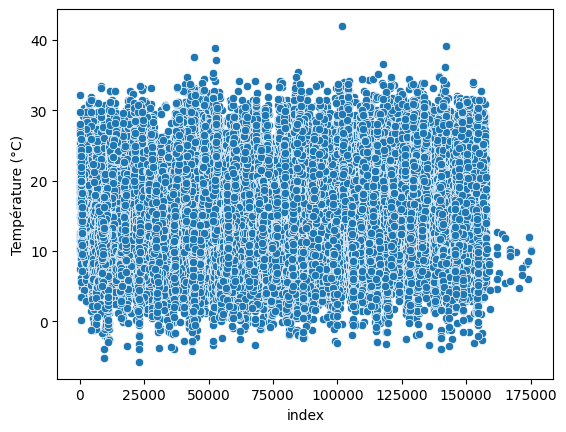

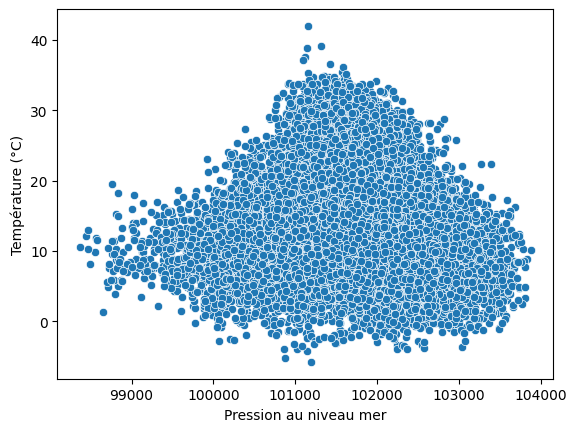

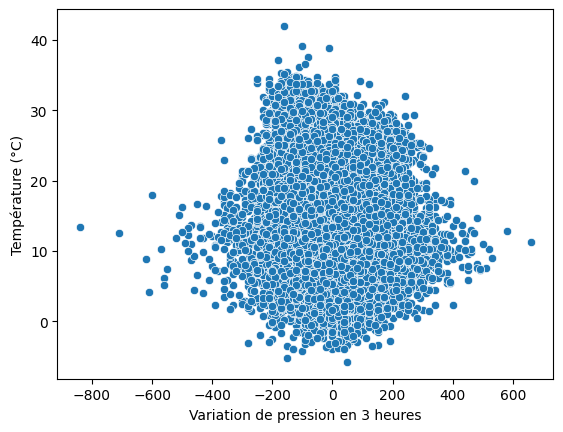

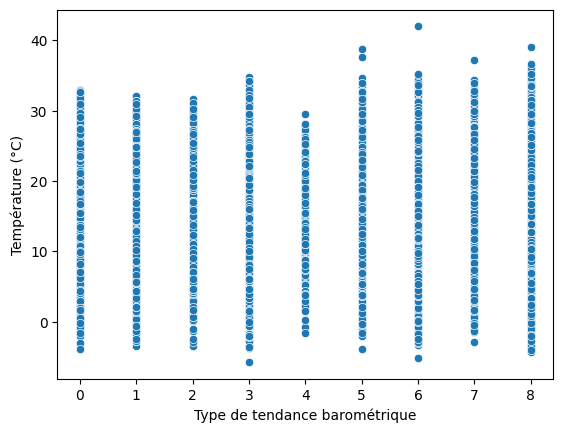

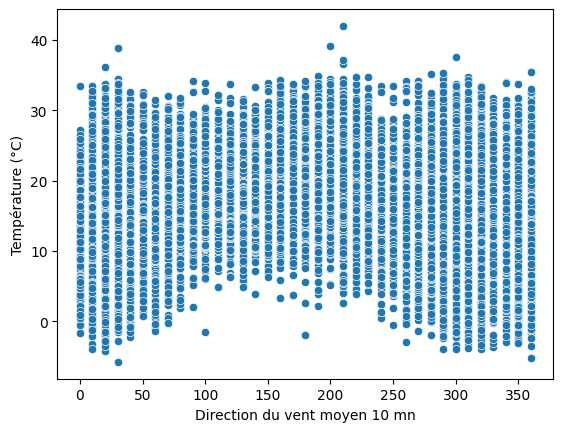

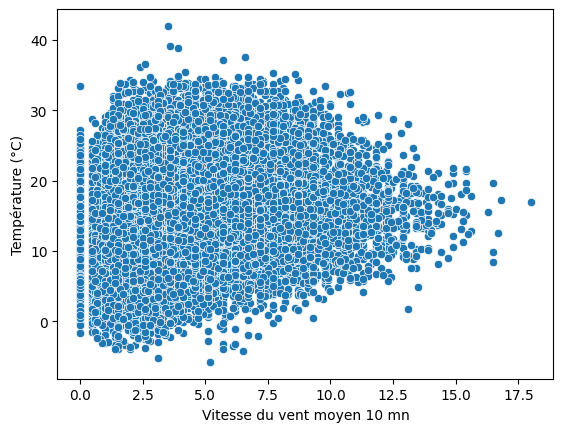

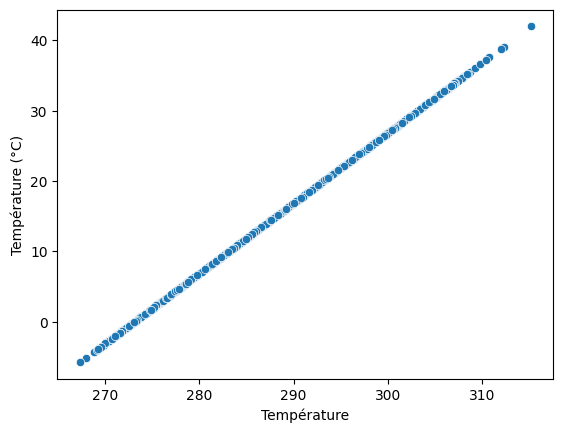

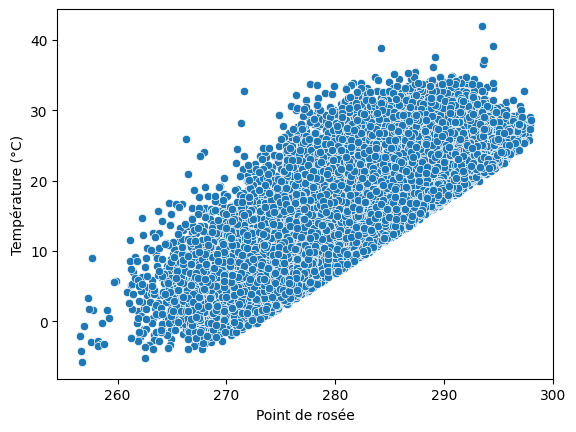

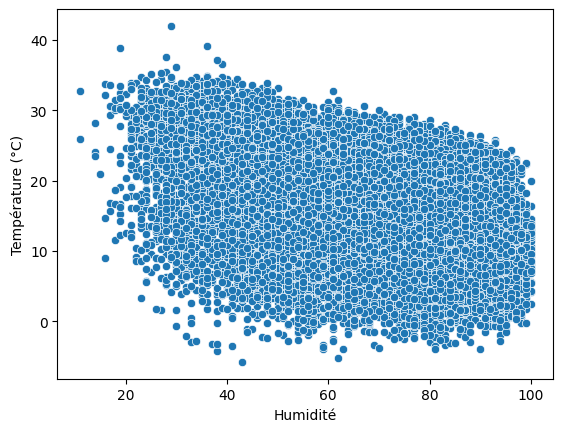

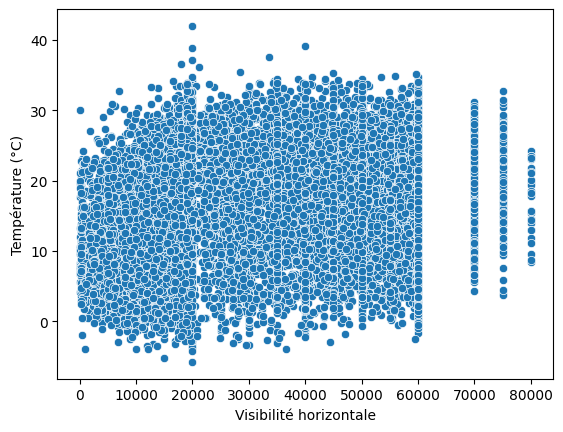

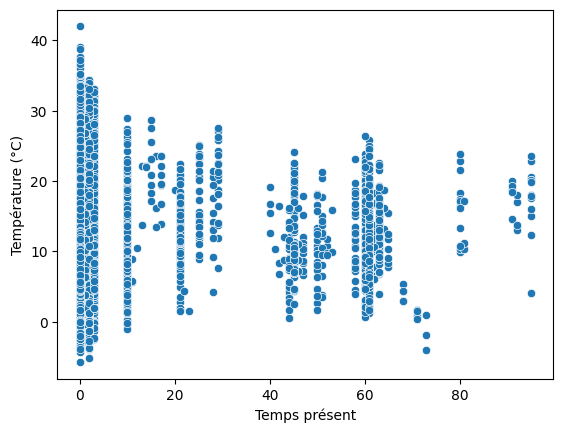

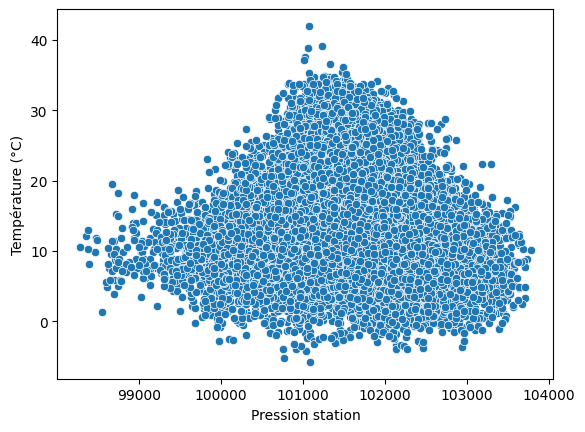

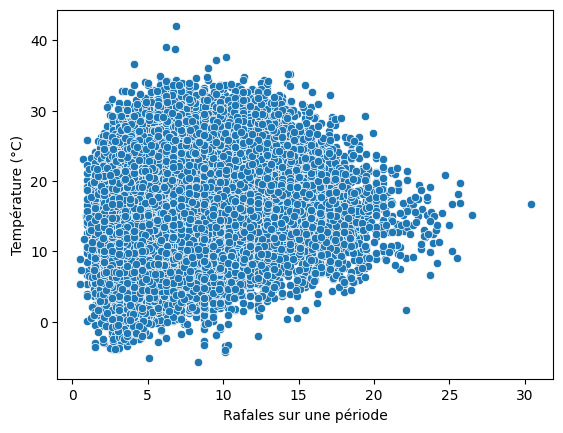

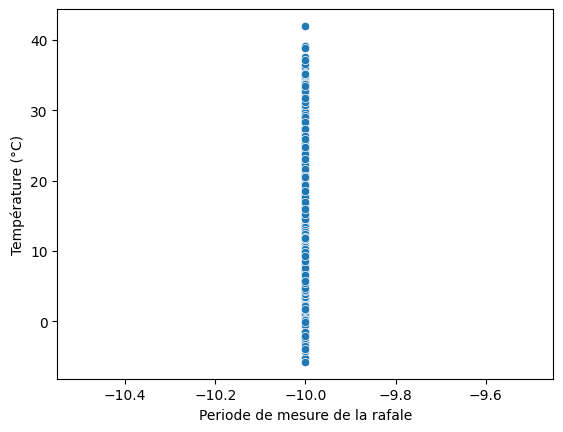

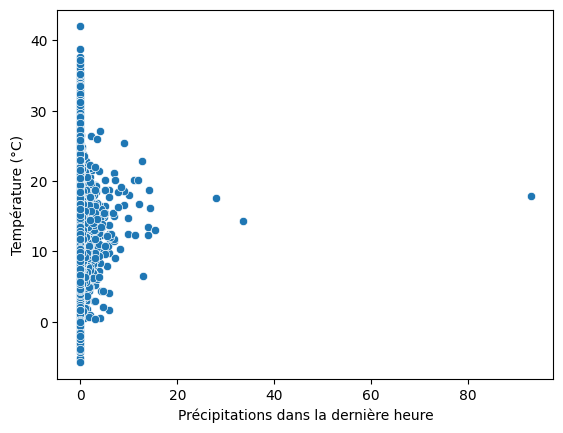

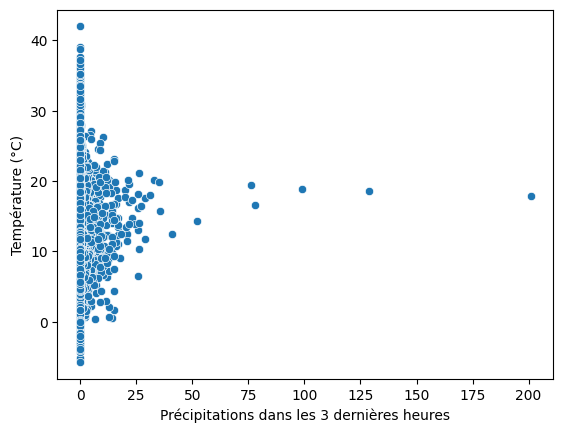

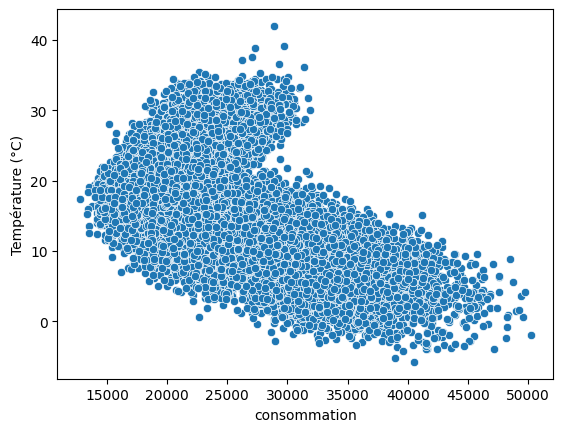

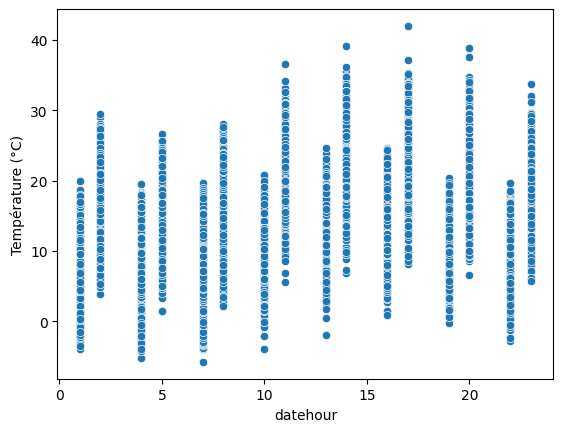

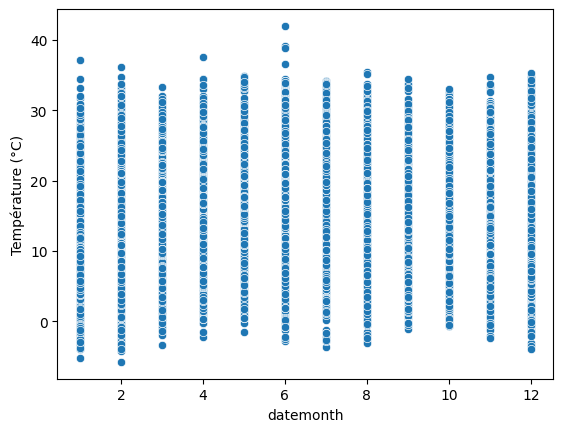

In [ ]:
features = ['index', 'Pression au niveau mer', 'Variation de pression en 3 heures',
            'Type de tendance barométrique', 'Direction du vent moyen 10 mn',
            'Vitesse du vent moyen 10 mn', 'Température', 'Point de rosée',
            'Humidité', 'Visibilité horizontale', 'Temps présent',
            'Pression station', 'Rafales sur une période',
            'Periode de mesure de la rafale',
            'Précipitations dans la dernière heure',
            'Précipitations dans les 3 dernières heures',
            'consommation', 'datehour', 'datemonth']
for feature in features:
    sns.scatterplot(data=df, x=feature, y='Température (\u00b0C)')
    plt.show()

Corrélation entre les variables numériques

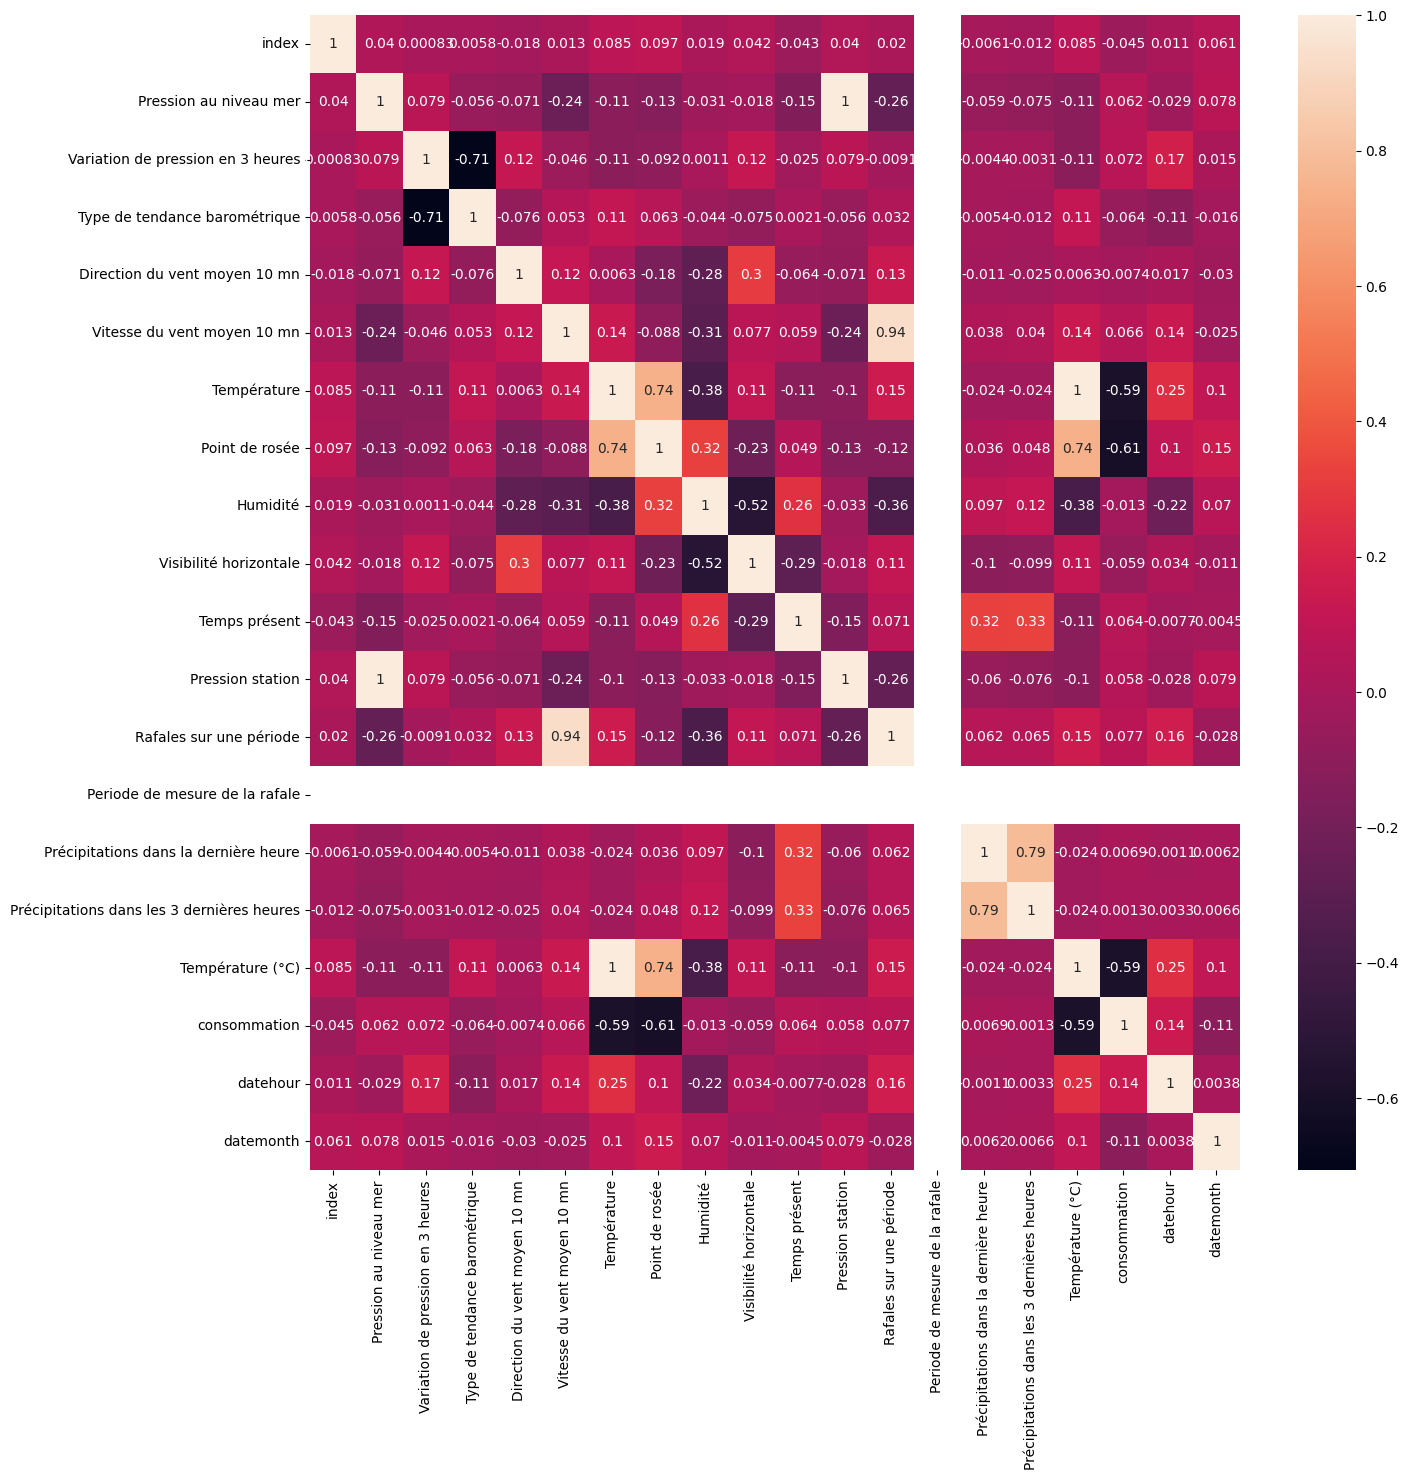

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Traitement des valeurs manquantes pour certaines colonnes spécifiques

In [ ]:
columns_to_fill = ["Variation de pression en 3 heures", "Temps présent",
                   "Précipitations dans la dernière heure",
                   "Précipitations dans les 3 dernières heures"]
for col in columns_to_fill:
    df[col].fillna(df[col].median(), inplace=True)

Utilisation de KNNImputer pour imputer les valeurs manquantes des colonnes numériques

In [ ]:
imputer = KNNImputer()
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[[col]] = imputer.fit_transform(df[[col]])

Vérification des valeurs manquantes après imputation

In [ ]:
df.isnull().sum()

index                                         0
Date_Heure                                    0
Pression au niveau mer                        0
Variation de pression en 3 heures             0
Type de tendance barométrique                 0
Direction du vent moyen 10 mn                 0
Vitesse du vent moyen 10 mn                   0
Température                                   0
Point de rosée                                0
Humidité                                      0
Visibilité horizontale                        0
Temps présent                                 0
Pression station                              0
Rafales sur une période                       0
Periode de mesure de la rafale                0
Précipitations dans la dernière heure         0
Précipitations dans les 3 dernières heures    0
Température (°C)                              0
consommation                                  0
datehour                                      0
datemonth                               

Fonction pour calculer les bornes des valeurs aberrantes

In [ ]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

Traitement des valeurs aberrantes

In [ ]:
outlier_columns = ['Température', 'Humidité', 'Visibilité horizontale', 'Pression station']
for col in outlier_columns:
    lw, uw = wisker(df[col])
    df[col] = np.where(df[col] > uw, uw, df[col])
    df[col] = np.where(df[col] < lw, lw, df[col])

Suppression des doublons

In [ ]:
df.drop_duplicates(inplace=True)

Préparation des données pour la prédiction

In [ ]:
target = 'Température (\u00b0C)'
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target]).columns
X = df[features]
y = df[target]

Division des données en ensemble d'entraînement et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modèle de régression linéaire

In [ ]:
# Supprimer les lignes avec des valeurs cibles manquantes dans y_train
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()

# Imputer les valeurs manquantes dans X_train_clean
X_train_imputed = imputer.fit_transform(X_train_clean)

linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train_clean)

LinearRegression()

Prédictions avec le modèle de régression linéaire

In [ ]:
# Imputer les valeurs manquantes dans X_test
X_test_imputed = imputer.transform(X_test)

# Faire des prédictions avec le modèle de régression linéaire
y_pred_linear = linear_model.predict(X_test_imputed)

Évaluation du modèle

In [ ]:
# Filtrer les valeurs NaN
mask = ~np.isnan(y_pred_linear) & ~np.isnan(y_test)
y_test_filtered = y_test[mask]
y_pred_linear_filtered = y_pred_linear[mask]

eval_linear = {
    "Mean Squared Error": mean_squared_error(y_test_filtered, y_pred_linear_filtered),
    "R^2 Score": r2_score(y_test_filtered, y_pred_linear_filtered)
}
print("Performance du modèle de régression linéaire:", eval_linear)

Performance du modèle de régression linéaire: {'Mean Squared Error': 5.576830347947606e-26, 'R^2 Score': 1.0}


Visualisation des prédictions vs valeurs réelles

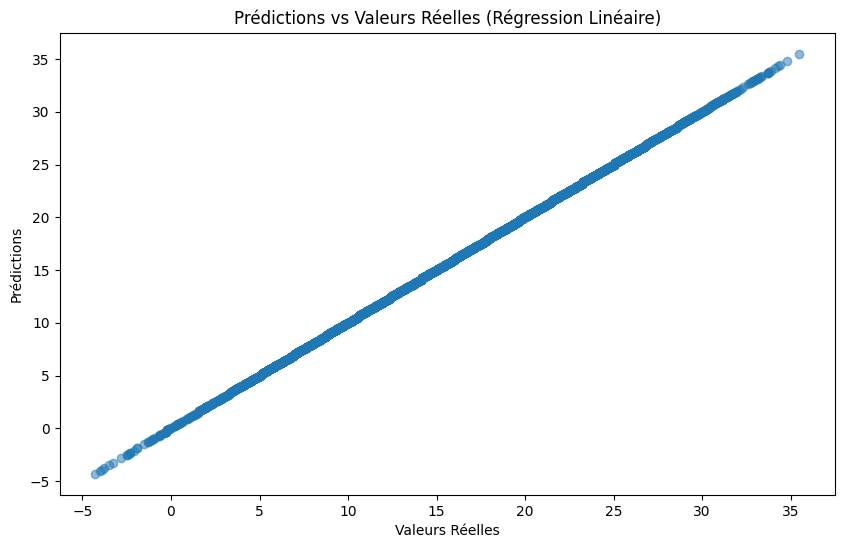

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles (Régression Linéaire)")
plt.show()

Modèle de régression par forêt aléatoire

In [ ]:
# Supprimer les lignes avec des valeurs cibles manquantes dans y_train
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()

# Imputer les valeurs manquantes dans X_train_clean
X_train_imputed = imputer.fit_transform(X_train_clean)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train_clean)

RandomForestRegressor(random_state=42)

Prédictions avec le modèle de forêt aléatoire

In [ ]:
y_pred_rf = rf_model.predict(X_test)

Évaluation du modèle

In [ ]:
# Filtrer les valeurs NaN
mask_rf = ~np.isnan(y_pred_rf) & ~np.isnan(y_test)
y_test_filtered_rf = y_test[mask_rf]
y_pred_rf_filtered = y_pred_rf[mask_rf]

eval_rf = {
    "Mean Squared Error": mean_squared_error(y_test_filtered_rf, y_pred_rf_filtered),
    "R^2 Score": r2_score(y_test_filtered_rf, y_pred_rf_filtered)
}
print("Performance du modèle de forêt aléatoire:", eval_rf)

Performance du modèle de forêt aléatoire: {'Mean Squared Error': 5.519446047316767e-05, 'R^2 Score': 0.9999989467742014}


Visualisation des prédictions vs valeurs réelles (forêt aléatoire)

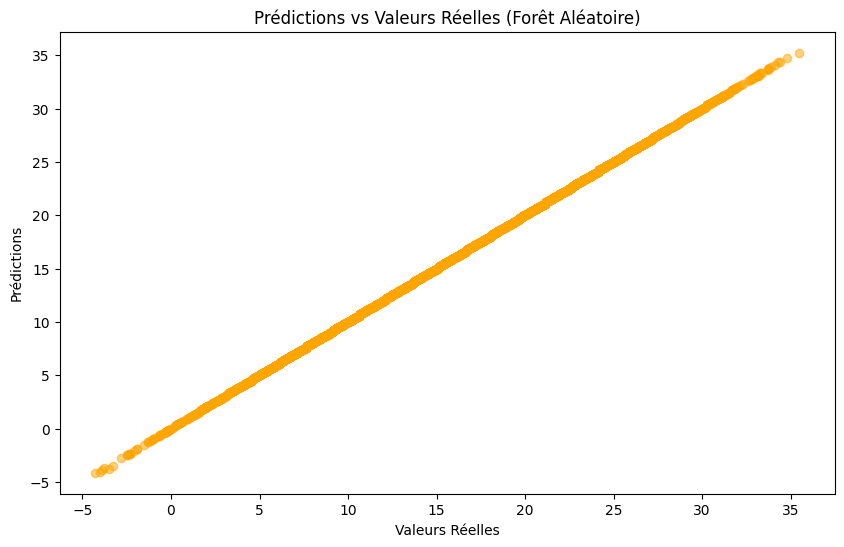

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles (Forêt Aléatoire)")
plt.show()
